In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv("weather.csv")

In [35]:
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [36]:
# 1. Find all the unique 'Wind Speed' values in the data.
unique_wind_speeds = data['Wind Speed_km/h'].unique()

print("Unique Wind Speed values:")
for speed in unique_wind_speeds:
    print(speed)

Unique Wind Speed values:
4
7
6
9
15
13
20
22
19
24
30
35
39
32
33
26
44
43
48
37
28
17
11
0
83
70
57
46
41
52
50
63
54
2


In [37]:
# 4) Find out all the Null Values in the data.

null_values = data.isnull().sum()

print("Null Values in the data:")
print(null_values)

Null Values in the data:
Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [38]:
# 5) Rename the column name 'Weather' of the dataframe to 'Weather Condition'.

data.rename(columns={'Weather': 'Weather Condition'}, inplace=True)
print(data.head())

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa     Weather Condition  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


In [39]:
# 6) What is the mean 'Visibility' ?

mean_visibility = data['Visibility_km'].mean()
print("Mean Visibility:", mean_visibility)

Mean Visibility: 27.664446721311478


In [40]:
# 9) Find all instances when 'Snow' was recorded.
snow_records = data[data['Weather Condition'].str.contains('Snow', case=False)]
print("Instances when 'Snow' was recorded:")
print(snow_records)

Instances when 'Snow' was recorded:
             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
41      1/2/2012 17:00    -2.1              -9.5         57               22   
44      1/2/2012 20:00    -5.6             -13.4         54               24   
45      1/2/2012 21:00    -5.8             -12.8         58               26   
47      1/2/2012 23:00    -7.4             -14.1         59               17   
48       1/3/2012 0:00    -9.0             -16.0         57               28   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

   

In [41]:
# Basic analysis
print(data.describe())

            Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000  


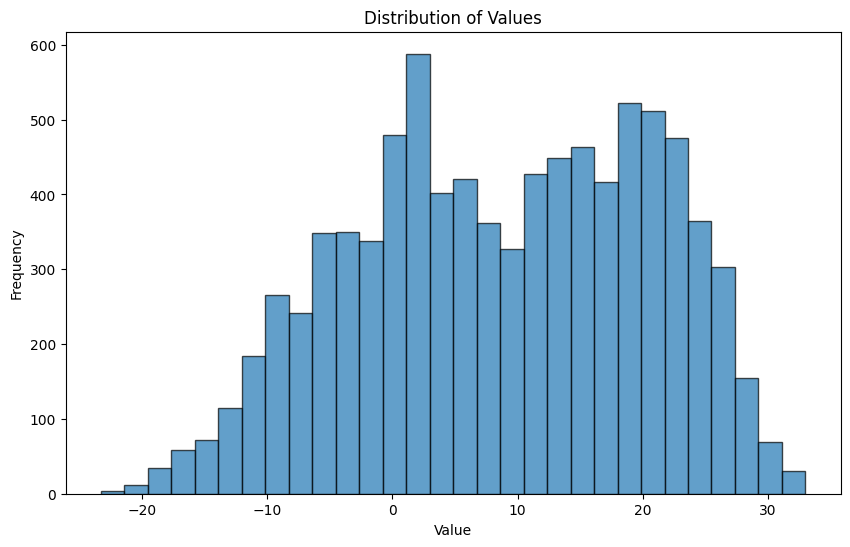

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(data['Temp_C'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()